In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

In [8]:
languages = ['JavaScript']
d ={}
b={}
for language in languages:
    d[language] =[]
    b[language]=[]

In [9]:
def plot_roc_curve(model, X_test, y_test, model_name, color):
    # Get the probability predictions for the positive class
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Compute AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

Random forest
[[51  0]
 [ 0 51]]
[[4 2]
 [3 3]]
              precision    recall  f1-score   support

         low       0.57      0.67      0.62         6
        high       0.60      0.50      0.55         6

    accuracy                           0.58        12
   macro avg       0.59      0.58      0.58        12
weighted avg       0.59      0.58      0.58        12

K_fold: [0.39130435 0.65217391 0.54545455 0.22727273 0.45454545], 
mean=0.4541501976284585

DecisionTree
[[51  0]
 [ 0 51]]
[[4 2]
 [3 3]]
              precision    recall  f1-score   support

         low       0.57      0.67      0.62         6
        high       0.60      0.50      0.55         6

    accuracy                           0.58        12
   macro avg       0.59      0.58      0.58        12
weighted avg       0.59      0.58      0.58        12

K_fold: [0.39130435 0.60869565 0.45454545 0.31818182 0.54545455], 
mean: 0.4636363636363637

Xgboost
[[51  0]
 [ 1 50]]
[[4 2]
 [3 3]]
              precision 

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[[43  8]
 [38 13]]
[[6 0]
 [3 3]]
              precision    recall  f1-score   support

         low       0.67      1.00      0.80         6
        high       1.00      0.50      0.67         6

    accuracy                           0.75        12
   macro avg       0.83      0.75      0.73        12
weighted avg       0.83      0.75      0.73        12

K_fold:[0.39130435 0.39130435 0.40909091 0.22727273 0.45454545], 
mean= 0.37470355731225297

Naive Bayes
[[41 10]
 [38 13]]
[[5 1]
 [3 3]]
              precision    recall  f1-score   support

         low       0.62      0.83      0.71         6
        high       0.75      0.50      0.60         6

    accuracy                           0.67        12
   macro avg       0.69      0.67      0.66        12
weighted avg       0.69      0.67      0.66        12

K_fold:[0.34782609 0.43478261 0.45454545 0.27272727 0.5       ], 
mean= 0.40197628458498025

Logistic Regression
[[32 19]
 [32 19]]
[[6 0]
 [2 4]]
              precision   

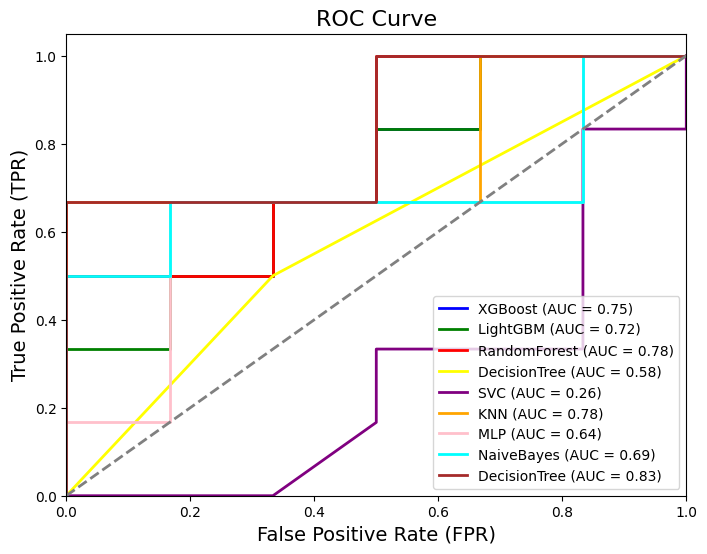

In [10]:
for language in languages:
    # print(language)
    df = pd.read_csv(f'data/normalized/language2/{language}.csv')
    labels=['low','high']

    df[f'{language}_tiobe_label'] = df[f'{language}_tiobe_label'].astype('category')
    df[f'{language}_tiobe_label_encoded'] = df[f'{language}_tiobe_label'].cat.codes
    X = df[[f'{language}_wiki', f'{language}_gtrend']]
    y = df[f'{language}_tiobe_label_encoded'] 

    stratified_cv = StratifiedKFold(n_splits=5)
    X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train1, y_train1)


    
    print("Random forest")
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    rf_cv_scores = cross_val_score(rf_model, X, y, cv=stratified_cv, scoring='accuracy') 
    rf_model.fit(X_train, y_train)
    y_pred_train = rf_model.predict(X_train)
    print(confusion_matrix(y_train, y_pred_train))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=labels))
    print(f"K_fold: {rf_cv_scores}, \nmean={rf_cv_scores.mean()}")

    print()
    print("DecisionTree")
    dt_model = DecisionTreeClassifier()
    dt_model.fit(X_train, y_train)
    y_pred = dt_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    dt_cv_scores = cross_val_score(dt_model, X, y, cv=stratified_cv, scoring='accuracy') 
    dt_model.fit(X_train, y_train)
    y_pred_train = dt_model.predict(X_train)
    print(confusion_matrix(y_train, y_pred_train))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=labels))
    print(f"K_fold: {dt_cv_scores}, \nmean: {dt_cv_scores.mean()}")


    print()
    print("Xgboost")
    xgb_model = XGBClassifier()
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=stratified_cv, scoring='accuracy') 
    xgb_model.fit(X_train, y_train)
    y_pred_train = xgb_model.predict(X_train)
    print(confusion_matrix(y_train, y_pred_train))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=labels))
    print(f"K_fold: {xgb_cv_scores}, \nmean= {xgb_cv_scores.mean()}")


    print()
    print("LightGBM")
    lgb_model = LGBMClassifier()
    lgb_model.fit(X_train, y_train)
    y_pred = lgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    lgb_cv_scores = cross_val_score(lgb_model, X, y, cv=stratified_cv, scoring='accuracy') 
    lgb_model.fit(X_train, y_train)
    y_pred_train = lgb_model.predict(X_train)
    print(confusion_matrix(y_train, y_pred_train))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=labels))
    print(f"K_fold: {lgb_cv_scores}, \nmean={lgb_cv_scores.mean()}")


    print()
    print("SVC")
    svc_model = SVC(probability=True)
    svc_model.fit(X_train, y_train)
    y_pred = svc_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    svc_cv_scores = cross_val_score(svc_model, X, y, cv=stratified_cv, scoring='accuracy') 
    svc_model.fit(X_train, y_train)
    y_pred_train = svc_model.predict(X_train)
    print(confusion_matrix(y_train, y_pred_train))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=labels))
    print(f"K_fold:{svc_cv_scores}, \nmean={svc_cv_scores.mean()}")

    print()
    print("KNN")
    knn_model = KNeighborsClassifier()
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    knn_cv_scores = cross_val_score(knn_model, X, y, cv=stratified_cv, scoring='accuracy') 
    knn_model.fit(X_train, y_train)
    y_pred_train = knn_model.predict(X_train)
    print(confusion_matrix(y_train, y_pred_train))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=labels))
    print(f"K_fold:{knn_cv_scores}, \nmean={knn_cv_scores.mean()}")

    print()
    print("MLP")
    mlp_model = MLPClassifier()
    mlp_model.fit(X_train, y_train)
    y_pred = mlp_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    mlp_cv_scores = cross_val_score(mlp_model, X, y, cv=stratified_cv, scoring='accuracy') 
    mlp_model.fit(X_train, y_train)
    y_pred_train = mlp_model.predict(X_train)
    print(confusion_matrix(y_train, y_pred_train))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=labels))
    print(f"K_fold:{mlp_cv_scores}, \nmean= {mlp_cv_scores.mean()}")
    
    print()
    print("Naive Bayes")
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    y_pred = nb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    nb_cv_scores = cross_val_score(nb_model, X, y, cv=stratified_cv, scoring='accuracy') 
    nb_model.fit(X_train, y_train)
    y_pred_train = nb_model.predict(X_train)
    print(confusion_matrix(y_train, y_pred_train))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=labels))
    print(f"K_fold:{nb_cv_scores}, \nmean= {nb_cv_scores.mean()}")

    print()
    print("Logistic Regression")
    lr_model = LogisticRegression()
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    lr_cv_scores = cross_val_score(lr_model, X, y, cv=stratified_cv, scoring='accuracy') 
    lr_model.fit(X_train, y_train)
    y_pred_train = lr_model.predict(X_train)
    print(confusion_matrix(y_train, y_pred_train))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=labels))
    print(f"K_fold:{lr_cv_scores}, \nmean= {lr_cv_scores.mean()}")

    
    plt.figure(figsize=(8, 6))

    plot_roc_curve(xgb_model, X_test, y_test, 'XGBoost', color='blue')
    plot_roc_curve(lgb_model, X_test, y_test, 'LightGBM', color='green')
    plot_roc_curve(rf_model, X_test, y_test, 'RandomForest', color='red')
    plot_roc_curve(dt_model, X_test, y_test, 'DecisionTree', color='yellow')
    plot_roc_curve(svc_model, X_test, y_test, 'SVC', color='purple')
    plot_roc_curve(knn_model, X_test, y_test, 'KNN', color='orange')
    plot_roc_curve(mlp_model, X_test, y_test, 'MLP', color='pink')
    plot_roc_curve(nb_model, X_test, y_test, 'NaiveBayes', color='cyan')
    plot_roc_curve(lr_model, X_test, y_test, 'DecisionTree', color='brown')



    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (chance level)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)', fontsize=14)
    plt.ylabel('True Positive Rate (TPR)', fontsize=14)
    plt.title('ROC Curve', fontsize=16)
    plt.legend(loc='lower right')
    plt.show()


In [11]:
for key, val in d.items():
    print(f'{key} : ', end='')
    for v in val:
        print("{:.2f}".format(v), end=',  ')
    print()
    

JavaScript : 


In [12]:
for key, val in b.items():
    print(f'{key} : ', end='')
    for v in val:
        print("{:.2f}".format(v), end=',  ')
    print()
    

JavaScript : 
